# Notebooks com aulas da quarentena DataScience

In [0]:
import pandas as pd

In [5]:
movies = pd.read_csv("https://raw.githubusercontent.com/marcostark/quarentena-data-science/master/datasets/ml-latest-small/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings = pd.read_csv("https://raw.githubusercontent.com/marcostark/quarentena-data-science/master/datasets/ml-latest-small/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Consultar a documentação dentro do notebbok

É possível consultar as docstrings dos metodos e funções apenas colocando o simbolo ? antes da chamaada, será aberta uma pequena janela com as informações resumidas

In [0]:
? movies.head

In [0]:
? movies

In [9]:
# Buscando informação da "forma" dos dados, o primeiro parametro indica o 
# número de linhas e o segundo o número de colunas

movies.shape

(9742, 3)

In [10]:
ratings.shape

(100836, 4)

Renomeando colunas de um dataframe

In [11]:
ratings.columns = ["usuarioId","filmeId","nota","momento"]
ratings.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
# Buscando um filme a partir do id usando o metodo .query.
ratings_movie_1 = ratings.query("filmeId==1")
ratings_movie_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [14]:
# Analisando estasticas gerais dos dados atravez do metodo .describe
ratings_movie_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Recuperando os valores de uma determinada coluna para calculo da média apenas das notas. Para acessar uma determinada coluna de um dataframe pode ser feito atravéz do comando dataframe["nome_da_coluna"], isso irá retornar uma Série pandas, onde o index é mantido.

In [16]:
rating = ratings["nota"]
rating

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [18]:
# média de todas as notas
rating.mean()

3.501556983616962

In [19]:
# Calculando a média do filme 1
ratings_movie_1["nota"].mean()

3.9209302325581397

### Calculando a média de todos os filmes

Para calculo da média de todos os filmes podemos primeiro agrupar as notadas de todos os filmes e depois calcular a média, isso pode ser feito usando o comando groupBy(filmeId), o parâmetro passado é utilizado para indicar qual coluna será agrupada.

In [22]:
notes_grouped_by_media = ratings.groupby("filmeId")["nota"].mean()
notes_grouped_by_media

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

Com todas as médias calculadas podemos unir com as informações do filmes, para isso pode-se utilizar o comando `.join()`, a partir disso será criado um novo dataframe

In [24]:
movies_by_media = movies.join(notes_grouped_by_media, on="movieId")
movies_by_media

,movieId,title,genres,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [25]:
# Ordenando DataFrame por nota em ordem descrescente
movies_by_media.sort_values("nota", ascending=False).head(15)

,movieId,title,genres,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Vizualizando dados atravéz de gráficos utilizando o método `.ploy()`

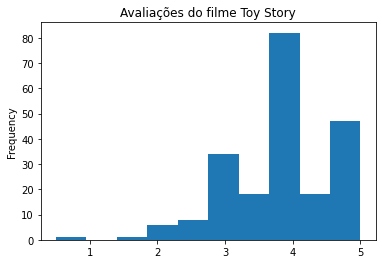

In [28]:
ratings.query("filmeId == 1")["nota"].plot(kind='hist', title="Avaliações do filme Toy Story")

#### Plotando gráficos utilizando o matplotlib

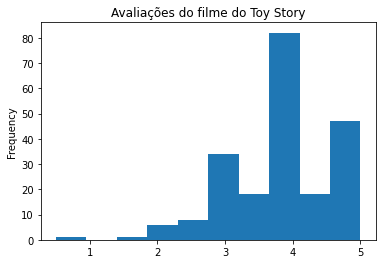

In [29]:
import matplotlib.pyplot as plt

ratings.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme do Toy Story")
plt.show()